![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [40]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


Explore the crimes.csv dataset and use your findings to answer the following questions:

- Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.
- Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.
- Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

### Eksploracja

In [2]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


### Zapoznanie się z wartościami w kolumnach

In [3]:
crimes['Crm Cd Desc'].value_counts()

Crm Cd Desc
THEFT OF IDENTITY                                     22670
BATTERY - SIMPLE ASSAULT                              19694
BURGLARY FROM VEHICLE                                 13799
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        13215
INTIMATE PARTNER - SIMPLE ASSAULT                     11981
                                                      ...  
BRIBERY                                                   1
GRAND THEFT / INSURANCE FRAUD                             1
DISRUPT SCHOOL                                            1
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        1
LYNCHING                                                  1
Name: count, Length: 104, dtype: int64

In [4]:
crimes['Vict Sex'].value_counts()

Vict Sex
M    93008
F    89854
X     2812
H       30
Name: count, dtype: int64

In [5]:
crimes.isnull().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

In [ ]:
# Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.
crimes['Hour'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M').dt.hour

In [38]:
crimes['Hours of crime'].value_counts()

Hours of crime
12:00:00    6462
18:00:00    3991
20:00:00    3769
17:00:00    3754
00:01:00    3587
            ... 
23:32:00       4
22:59:00       3
05:11:00       3
05:28:00       3
05:31:00       3
Name: count, Length: 1439, dtype: int64

Można zauważyć że najwięcej przestępst jest o godzinie 12:00

In [46]:
crimes['Hour']

0         11
1         16
2         12
3          6
4          9
          ..
185710    11
185711    18
185712    10
185713    16
185714     9
Name: Hour, Length: 185715, dtype: int32

In [48]:
# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.
night_crimes = crimes[(crimes['Hour'] >= 22) | (crimes['Hour'] <= 4)]
night_crimes['AREA NAME'].value_counts()

AREA NAME
Central        3565
Hollywood      2900
77th Street    2776
Southwest      2538
Southeast      2359
Olympic        2321
Newton         2311
Pacific        2103
N Hollywood    2036
Rampart        1989
Wilshire       1855
Van Nuys       1822
Northeast      1795
West Valley    1664
Topanga        1594
Mission        1562
West LA        1492
Harbor         1490
Devonshire     1447
Hollenbeck     1425
Foothill       1377
Name: count, dtype: int64

In [53]:
peak_night_crime = night_crimes.groupby('AREA NAME', as_index=False)['Hour'].count().sort_values('Hour', ascending=False)
peak_night_crime

,AREA NAME,Hour
1,Central,3565
6,Hollywood,2900
0,77th Street,2776
15,Southwest,2538
14,Southeast,2359
11,Olympic,2321
9,Newton,2311
12,Pacific,2103
8,N Hollywood,2036
13,Rampart,1989


In [58]:
print(f"The area with the largest volume of night crime is {peak_night_crime.iloc[0]['AREA NAME']}")

The area with the largest volume of night crime is Central


In [59]:
# Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.
crimes['Vict Age'].value_counts()


Vict Age
30    5715
35    5697
32    5481
31    5472
29    5438
      ... 
96      27
95      25
94      23
97      22
98      17
Name: count, Length: 98, dtype: int64

In [61]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes['Age Bracket'] = pd.cut(x=crimes['Vict Age'], bins=age_bins, labels=age_labels)
crimes['Age Bracket'].value_counts()

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64

# Solution

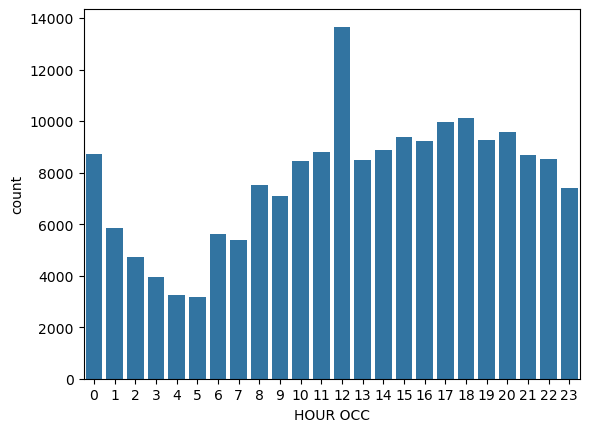

The area with the largest volume of night crime is Central
Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


In [49]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in and preview the dataset
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

## Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour

# Extract the first two digits from "TIME OCC", representing the hour,
# and convert to integer data type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

# Preview the DataFrame to confirm the new column is correct
crimes.head()

# Produce a countplot to find the largest frequency of crimes by hour
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

# Midday has the largest volume of crime
peak_crime_hour = 12

## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
## Save as a string variable called peak_night_crime_location
# Filter for the night-time hours
# 0 = midnight; 3 = crimes between 3am and 3:59am, i.e., don't include 4
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
peak_night_crime_location = night_time.groupby("AREA NAME", 
                                               as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",
                                                                                               ascending=False).iloc[0]["AREA NAME"]
# Print the peak night crime location
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
## Save as a pandas Series called victim_ages
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)